# 01_Data_Visualization_XYZ(Quadril x Joelho)

## TL;DR
Fazer uma descrição de 3 linhas do objetivo do notebook e conclusões presentes na análise.

## Objetivo

Descrever com clareza qual o objetivo desse notebook.

## Dados

Descrever a base de dados utilizada.

## Modelos (opcional)

Em caso de treinamento ou comparação de modelos, descrever os modelos considerados

## Conclusões
Listar **todas** as conclusões obtidas no notebook:
1. conclusão 1
2. conclusão 2
3. etc.


## Observações importantes:
1. Sempre organize o conteúdo utilizando células markdown e seções. Também utilize células de texto para escrever sua análise das figuras que forem geradas.
2. Lembre-se que essa primeira célula deve ter informação suficiente para entender o que foi feito e quais conclusões você chegou, sem ter que ler o notebook inteiro. Isso agiliza muito a busca por informações ao longo do projeto. Além disso, seu eu do futuro (ou novas pessoas que entrem no projeto) vai agradecer se o seu notebook estiver bem escrito e completo.

# Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Importando Dataset

In [2]:
# Pegando apenas a 23 coluna para fazer o data frame 
# Adicionando um Header para a coluna  
df = pd.read_csv("../../data/Volt(2)/20052024-142551.csv",skiprows=1,header=None) 
print(df.head())

         0         1         2         3       4       5         6         7   \
0  1515.237  0.004883  0.935547 -0.158203 -5.5625 -5.4375 -12.53125 -0.120117   
1  1515.268  0.004883  0.935547 -0.158203 -5.5625 -5.4375 -12.53125 -0.120117   
2  1515.302  0.004883  0.935547 -0.158203 -5.5625 -5.4375 -12.53125 -0.221680   
3  1515.335  0.004883  0.935547 -0.158203 -5.5625 -5.4375 -12.53125 -0.221680   
4  1515.368  0.004883  0.935547 -0.158203 -5.5625 -5.4375 -12.53125 -0.221680   

         8         9   ...        15        16        17       18        19  \
0  0.330078  0.704102  ...  0.228516  128.3438  37.65625 -47.8125  131.1707   
1  0.330078  0.704102  ...  0.228516  128.3438  37.65625 -47.8125  131.6240   
2  0.334961  0.883789  ...  0.228516  128.3438  37.65625 -47.8125  131.6240   
3  0.334961  0.883789  ...  0.228516  128.3438  37.65625 -47.8125  131.6240   
4  0.334961  0.883789  ...  0.228516  128.3438  37.65625 -47.8125  131.6240   

         20        21        22       

In [3]:
df.info()
print(df.isnull().sum())  # Quantidade de valores nulos
df.describe()
# Descrição estatistica da coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       405 non-null    float64
 1   1       405 non-null    float64
 2   2       405 non-null    float64
 3   3       405 non-null    float64
 4   4       405 non-null    float64
 5   5       405 non-null    float64
 6   6       405 non-null    float64
 7   7       405 non-null    float64
 8   8       405 non-null    float64
 9   9       405 non-null    float64
 10  10      405 non-null    float64
 11  11      405 non-null    float64
 12  12      405 non-null    float64
 13  13      405 non-null    float64
 14  14      405 non-null    float64
 15  15      405 non-null    float64
 16  16      405 non-null    float64
 17  17      405 non-null    float64
 18  18      405 non-null    float64
 19  19      405 non-null    float64
 20  20      405 non-null    float64
 21  21      405 non-null    float64
 22  22

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,...,4.050000e+02,4.050000e+02,405.00000,405.0000,405.000000,405.000000,405.000000,4.050000e+02,4.050000e+02,4.050000e+02
mean,1521.969859,0.025236,0.868936,-0.381216,1.546991,1.519676,1.180478,-0.232829,0.555360,0.685730,...,2.285156e-01,1.283438e+02,37.65625,-47.8125,117.637153,260.458062,253.051280,2.195107e+02,3.169044e+02,1.132661e+02
std,3.904281,0.097292,0.224360,0.239839,41.904114,8.182882,7.623328,0.134995,0.246977,0.260539,...,5.557981e-17,5.691373e-14,0.00000,0.0000,11.214488,21.455940,10.595738,5.691373e-14,5.691373e-14,5.691373e-14
min,1515.237000,-0.163086,0.139648,-0.985352,-87.406250,-22.843750,-26.937500,-0.723633,0.137695,-0.144531,...,2.285156e-01,1.283438e+02,37.65625,-47.8125,98.073230,216.695700,228.980500,2.195107e+02,3.169044e+02,1.132661e+02
25%,1518.599000,-0.032227,0.780273,-0.617188,-27.000000,-3.562500,-2.281250,-0.298828,0.375977,0.566406,...,2.285156e-01,1.283438e+02,37.65625,-47.8125,106.824700,244.860000,245.382500,2.195107e+02,3.169044e+02,1.132661e+02
50%,1521.962000,0.014648,0.867188,-0.312500,2.250000,-0.312500,0.281250,-0.243164,0.453125,0.798828,...,2.285156e-01,1.283438e+02,37.65625,-47.8125,113.819500,255.745700,253.548500,2.195107e+02,3.169044e+02,1.132661e+02
75%,1525.342000,0.092773,0.980469,-0.203125,17.250000,5.343750,6.218750,-0.149414,0.775391,0.849609,...,2.285156e-01,1.283438e+02,37.65625,-47.8125,129.855400,280.572500,262.694200,2.195107e+02,3.169044e+02,1.132661e+02
max,1528.690000,0.270508,1.790039,0.053711,101.062500,28.125000,30.125000,0.096680,1.258789,1.031250,...,2.285156e-01,1.283438e+02,37.65625,-47.8125,131.676600,289.462400,266.037200,2.195107e+02,3.169044e+02,1.132661e+02


In [4]:
# Contar valores ausentes
print("Valores nulos:", df.isnull().sum())

# Contar valores duplicados
print("Valores duplicados:", df.duplicated().sum())


Valores nulos: 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64
Valores duplicados: 0


# Criação de Index temporal

In [5]:
# Criando uma coluna de tempo (considerando que a 1ª linha é o tempo 0s)]

# Definindo essa coluna como o índice do DataFrame

df["Tempo (s)"] = np.arange(len(df)) / 30

df.set_index("Tempo (s)", inplace=True)

# Visualizando os dados após a conversão
print(df.head())

#Usando isso podemos ver que o exercicio vai ter no Total de .... 
print(df.tail())


                 0         1         2         3       4       5         6   \
Tempo (s)                                                                     
0.000000   1515.237  0.004883  0.935547 -0.158203 -5.5625 -5.4375 -12.53125   
0.033333   1515.268  0.004883  0.935547 -0.158203 -5.5625 -5.4375 -12.53125   
0.066667   1515.302  0.004883  0.935547 -0.158203 -5.5625 -5.4375 -12.53125   
0.100000   1515.335  0.004883  0.935547 -0.158203 -5.5625 -5.4375 -12.53125   
0.133333   1515.368  0.004883  0.935547 -0.158203 -5.5625 -5.4375 -12.53125   

                 7         8         9   ...        15        16        17  \
Tempo (s)                                ...                                 
0.000000  -0.120117  0.330078  0.704102  ...  0.228516  128.3438  37.65625   
0.033333  -0.120117  0.330078  0.704102  ...  0.228516  128.3438  37.65625   
0.066667  -0.221680  0.334961  0.883789  ...  0.228516  128.3438  37.65625   
0.100000  -0.221680  0.334961  0.883789  ...  0.228516  

# Separação de Quadril e Joelho 

### Seleção das colunas que contém os ângulos Quadril e Joelho (XYZ)

In [6]:

# Selecionar colunas de interesse
quadril_x = df.iloc[:, 19]
quadril_y = df.iloc[:, 20]
quadril_z = df.iloc[:, 21]
joelho_x = df.iloc[:, 22]
joelho_y = df.iloc[:, 23]
joelho_z = df.iloc[:, 24]

# Renomear colunas para facilitar análise
quadril_x.name = "Quadril X"
quadril_y.name = "Quadril Y"
quadril_z.name = "Quadril Z"
joelho_x.name = "Joelho X"
joelho_y.name = "Joelho Y"
joelho_z.name = "Joelho Z"

# Análise estatística individual
print("\nAnálise do Quadril:")
print(pd.DataFrame({quadril_x.name: quadril_x.describe(),
                    quadril_y.name: quadril_y.describe(),
                    quadril_z.name: quadril_z.describe()}))

print("\nAnálise do Joelho:")
print(pd.DataFrame({joelho_x.name: joelho_x.describe(),
                    joelho_y.name: joelho_y.describe(),
                    joelho_z.name: joelho_z.describe()}))




Análise do Quadril:
        Quadril X   Quadril Y   Quadril Z
count  405.000000  405.000000  405.000000
mean   117.637153  260.458062  253.051280
std     11.214488   21.455940   10.595738
min     98.073230  216.695700  228.980500
25%    106.824700  244.860000  245.382500
50%    113.819500  255.745700  253.548500
75%    129.855400  280.572500  262.694200
max    131.676600  289.462400  266.037200

Análise do Joelho:
           Joelho X      Joelho Y      Joelho Z
count  4.050000e+02  4.050000e+02  4.050000e+02
mean   2.195107e+02  3.169044e+02  1.132661e+02
std    5.691373e-14  5.691373e-14  5.691373e-14
min    2.195107e+02  3.169044e+02  1.132661e+02
25%    2.195107e+02  3.169044e+02  1.132661e+02
50%    2.195107e+02  3.169044e+02  1.132661e+02
75%    2.195107e+02  3.169044e+02  1.132661e+02
max    2.195107e+02  3.169044e+02  1.132661e+02


# Fazendo a Visualização de Dados

## Graficos dos Eixos X, Y e Z do Quadril e Joelho

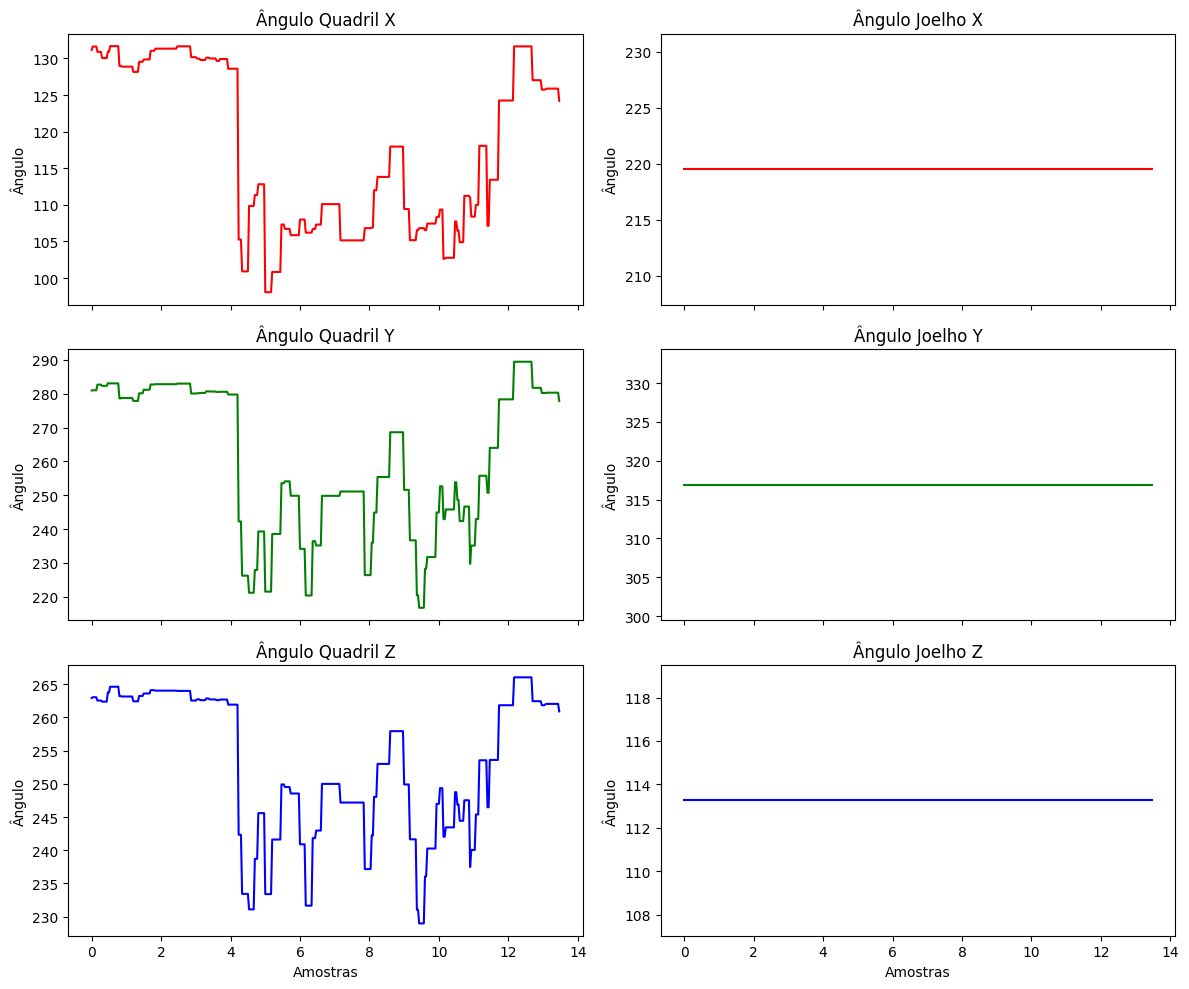

In [7]:
# Criar subplots 3x2 (3 linhas, 2 colunas)
fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True)

# Plot ângulos do quadril
axes[0, 0].plot(quadril_x, color="red")
axes[0, 0].set_title("Ângulo Quadril X")
axes[0, 0].set_ylabel("Ângulo")

axes[1, 0].plot(quadril_y, color="green")
axes[1, 0].set_title("Ângulo Quadril Y")
axes[1, 0].set_ylabel("Ângulo")

axes[2, 0].plot(quadril_z, color="blue")
axes[2, 0].set_title("Ângulo Quadril Z")
axes[2, 0].set_xlabel("Amostras")
axes[2, 0].set_ylabel("Ângulo")

# Plot ângulos do joelho
axes[0, 1].plot(joelho_x, color="red")
axes[0, 1].set_title("Ângulo Joelho X")
axes[0, 1].set_ylabel("Ângulo")

axes[1, 1].plot(joelho_y, color="green")
axes[1, 1].set_title("Ângulo Joelho Y")
axes[1, 1].set_ylabel("Ângulo")

axes[2, 1].plot(joelho_z, color="blue")
axes[2, 1].set_title("Ângulo Joelho Z")
axes[2, 1].set_xlabel("Amostras")
axes[2, 1].set_ylabel("Ângulo")

plt.tight_layout()
plt.show()

É possível observar que os eixos X em ambos os gráficos apresentam grande oscilação, tornando sua utilização para a análise de compensação de movimento mais desafiadora.

## Graficos dos Eixos X, Y e Z do Quadril com o index temporal

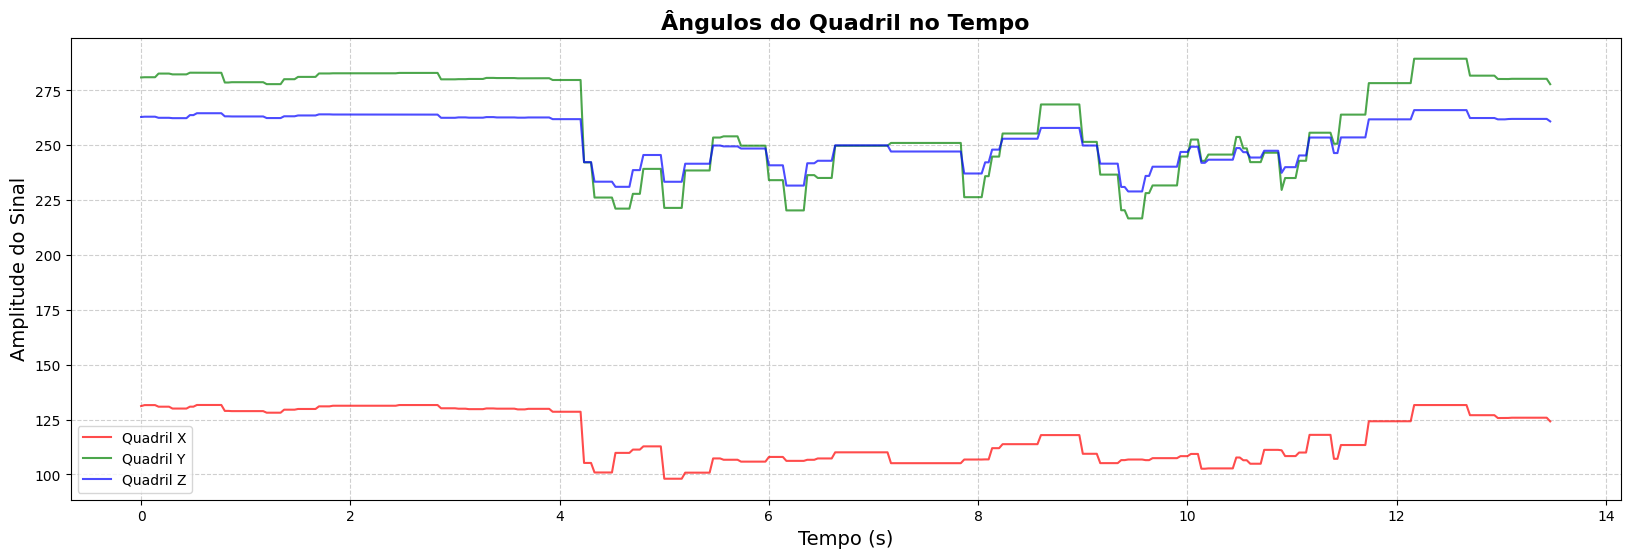

In [8]:


# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
plt.plot(df.index, quadril_x, color='red', alpha=0.7, linestyle="-", label="Quadril X")
plt.plot(df.index, quadril_y, color='green', alpha=0.7, linestyle="-", label="Quadril Y")
plt.plot(df.index, quadril_z, color='blue', alpha=0.7, linestyle="-", label="Quadril Z")

# Configurações do gráfico
plt.title("Ângulos do Quadril no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Exibir gráfico
plt.show()


Os eixos Y e Z permitem uma melhor identificação das variações ao longo do tempo, facilitando a análise do movimento.

## Graficos dos Eixos X, Y e Z do Joelho com o index temporal

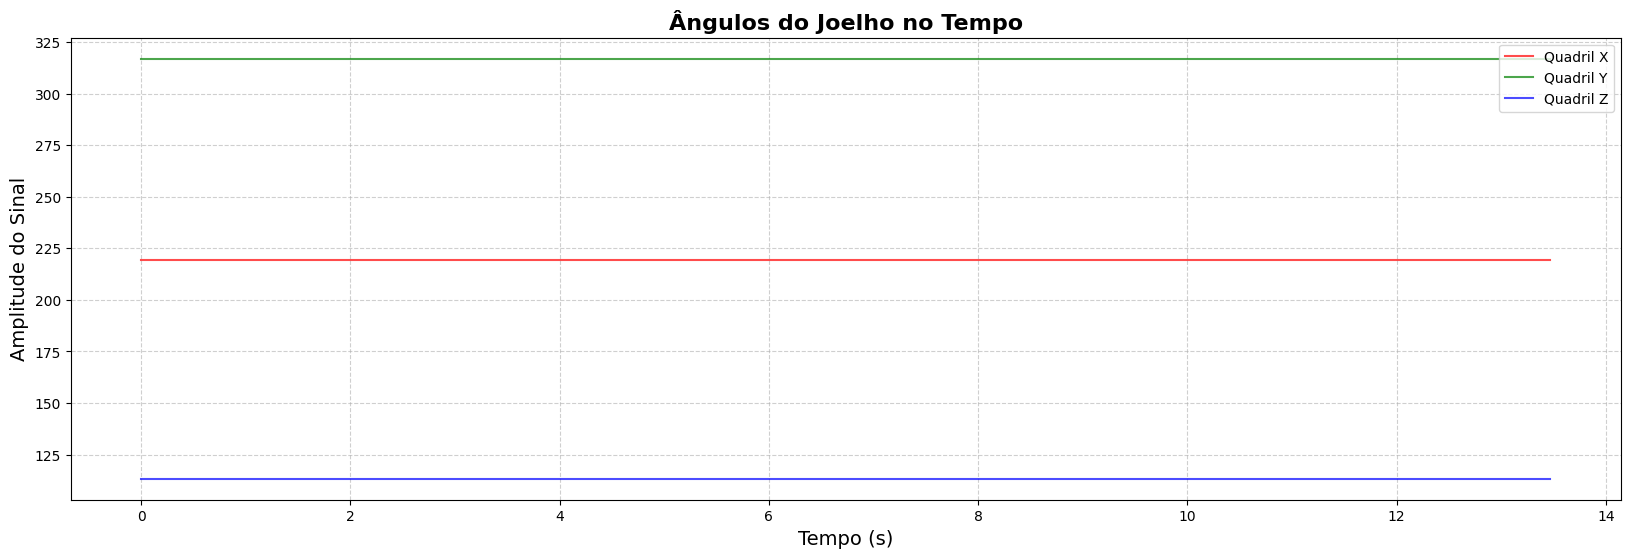

In [9]:


# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
plt.plot(df.index, joelho_x, color='red', alpha=0.7, linestyle="-", label="Quadril X")
plt.plot(df.index, joelho_y, color='green', alpha=0.7, linestyle="-", label="Quadril Y")
plt.plot(df.index, joelho_z, color='blue', alpha=0.7, linestyle="-", label="Quadril Z")

# Configurações do gráfico
plt.title("Ângulos do Joelho no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Exibir gráfico
plt.show()


Os eixos Y e Z permitem uma melhor identificação das variações ao longo do tempo, facilitando a análise do movimento.









## Grafico do Quadril e Joelho junto 

<Figure size 640x480 with 0 Axes>

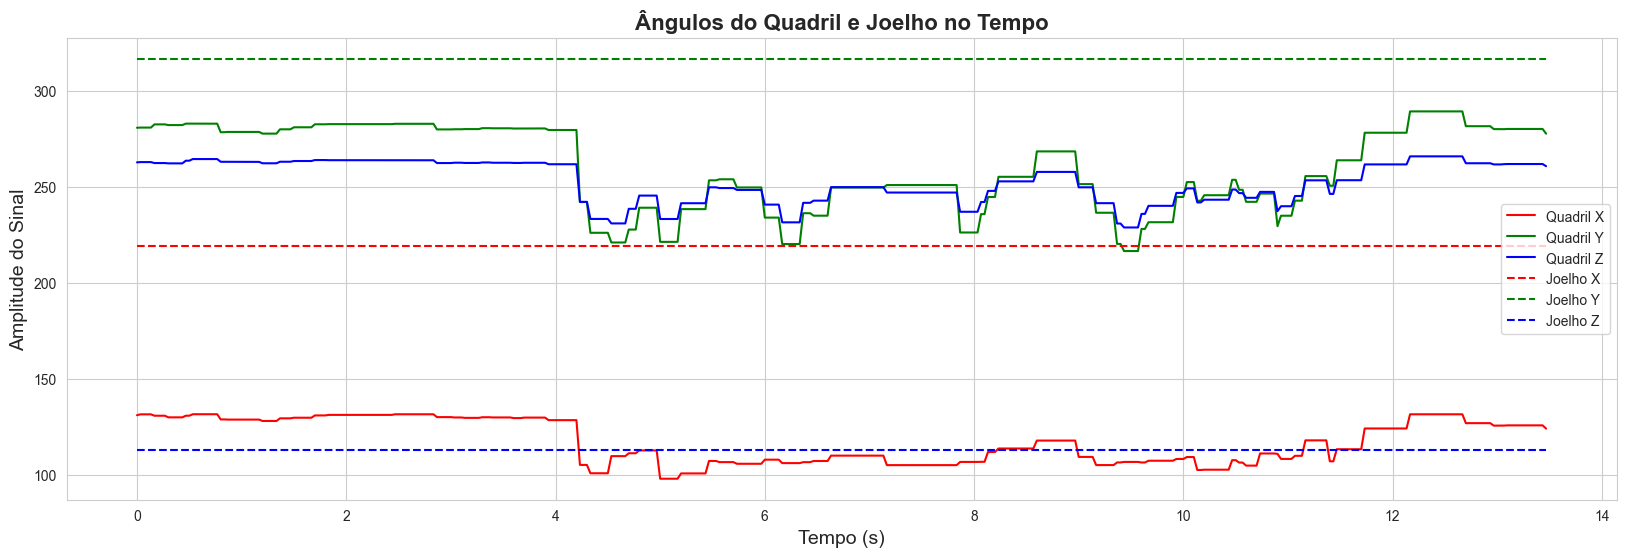

In [10]:

plt.clf()
sns.set_style("whitegrid")

# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
sns.lineplot(x=df.index, y=quadril_x, color='red', label="Quadril X")
sns.lineplot(x=df.index, y=quadril_y, color='green', label="Quadril Y")
sns.lineplot(x=df.index, y=quadril_z, color='blue', label="Quadril Z")

# Plotar os ângulos do joelho nos eixos X, Y e Z
sns.lineplot(x=df.index, y=joelho_x, color='red', linestyle="--", label="Joelho X")
sns.lineplot(x=df.index, y=joelho_y, color='green', linestyle="--", label="Joelho Y")
sns.lineplot(x=df.index, y=joelho_z, color='blue', linestyle="--", label="Joelho Z")

# Configurações do gráfico
plt.title("Ângulos do Quadril e Joelho no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.show()

Identificação de que o joelho se movimenta primeiro que o quadril

## Manipulação do tempo para melhor visualização dos gráficos

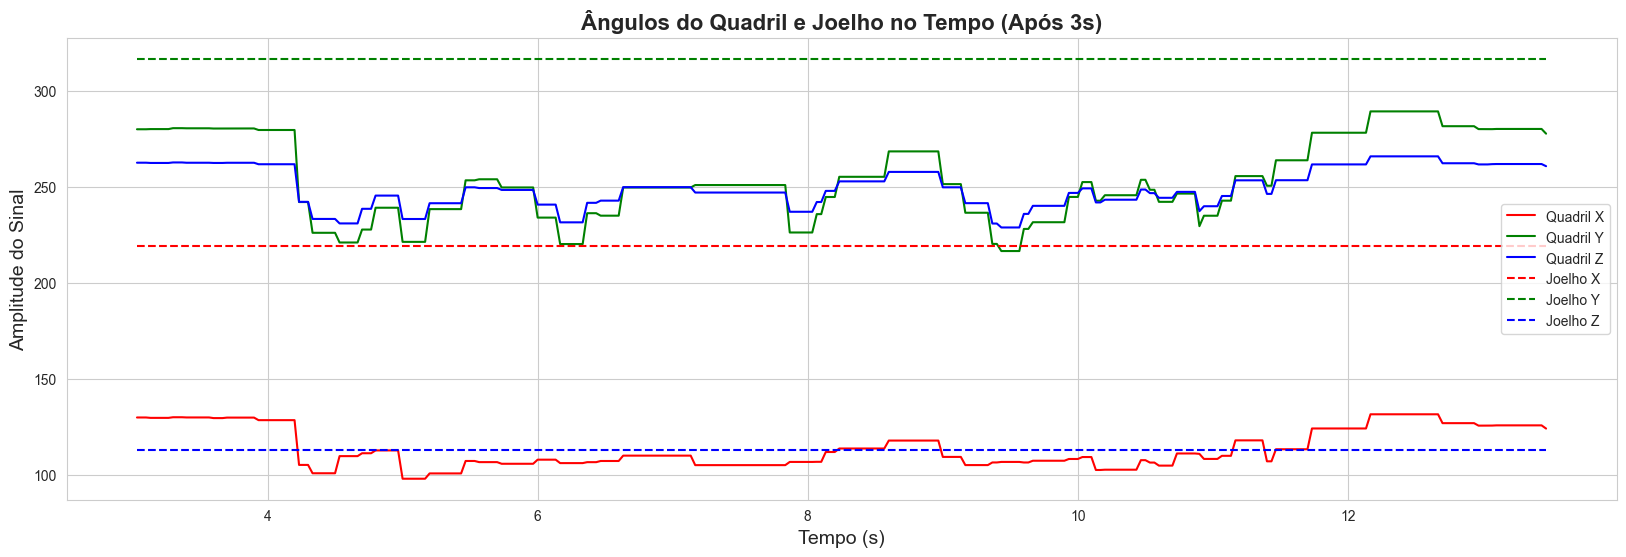

In [11]:


# Filtrar os dados para remover os primeiros 3 segundos
df_filtrado = df.loc[df.index > 3].copy() 

# Estilo do Seaborn para um visual mais profissional
sns.set_style("whitegrid")

# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 19], color='red', label="Quadril X")  # Coluna 19ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 20], color='green', label="Quadril Y")  # Coluna 20ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 21], color='blue', label="Quadril Z")  # Coluna 21ª

# Plotar os ângulos do joelho nos eixos X, Y e Z
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 22], color='red', linestyle="--", label="Joelho X")  # Coluna 22ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 23], color='green', linestyle="--", label="Joelho Y")  # Coluna 23ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 24], color='blue', linestyle="--", label="Joelho Z")  # Coluna 24ª

# Configurações do gráfico
plt.title("Ângulos do Quadril e Joelho no Tempo (Após 3s)", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.show()


# Conclusões

Ao longo deste teste, foi possível realizar uma análise detalhada dos ângulos do joelho e do quadril, tanto de forma individual quanto sincronizada. A separação clara dos eixos X, Y e Z permitiu uma avaliação mais precisa do comportamento de cada articulação ao longo do tempo. Além disso, identificou-se que os eixos X apresentaram maior oscilação, dificultando sua utilização na análise de compensação de movimento, enquanto os eixos Y e Z se mostraram mais estáveis e úteis para identificar variações. Dessa forma, a abordagem utilizada possibilitou uma melhor compreensão dos padrões de movimento e abre caminho para futuras investigações e aprimoramentos na análise biomecânica.
Pode copiar todo o conteúdo dessa seção lá na parte de conclusões do cabeçalho.